In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

In [ ]:
data = pd.read_excel('/content/glass.xlsx',sheet_name = 'glass')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
data.shape

(214, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


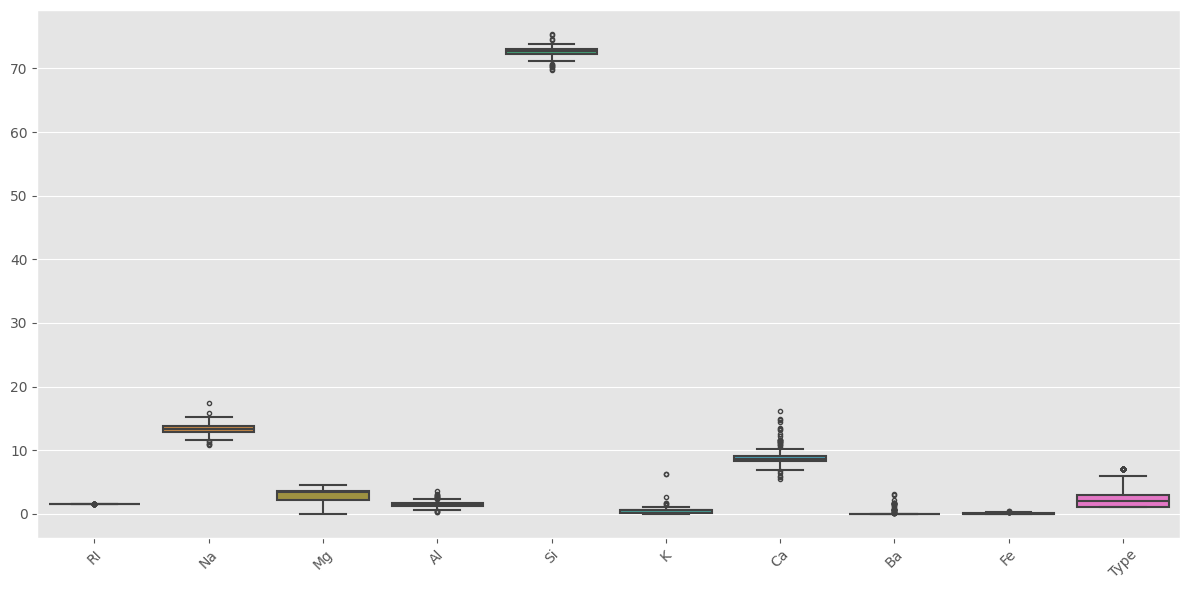

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, linewidth=1.5, fliersize=3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data.nunique()

,0
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type,6


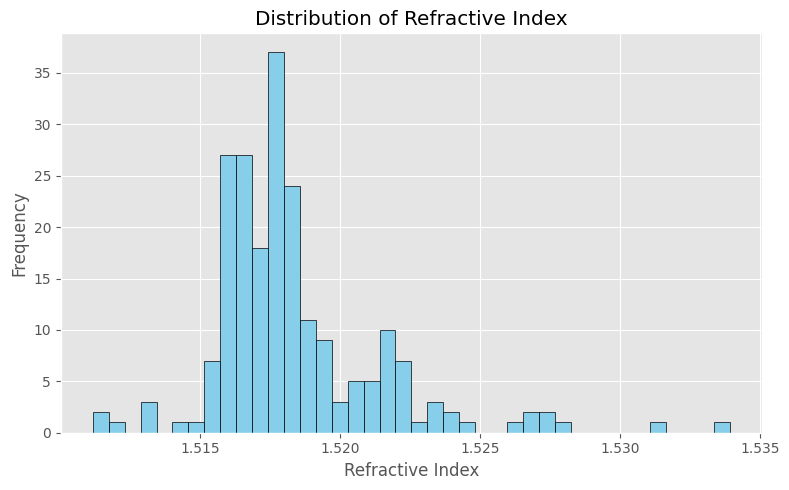

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(data['RI'], bins=40, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Refractive Index')
ax.set_xlabel('Refractive Index')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

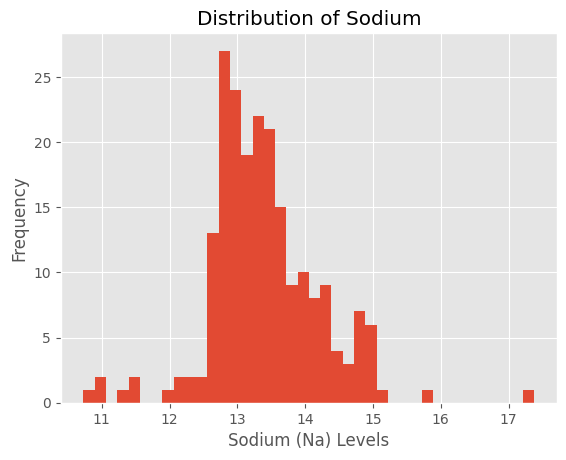

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['Na'], bins=40)
ax.set_title('Distribution of Sodium')
ax.set_xlabel('Sodium (Na) Levels')
ax.set_ylabel('Frequency')
plt.show()


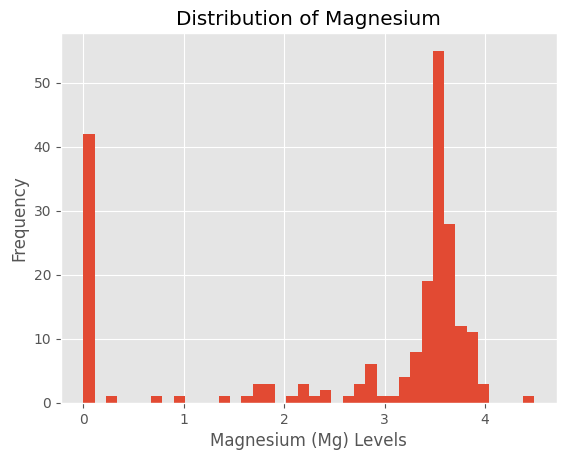

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['Mg'], bins=40)
ax.set_title('Distribution of Magnesium')
ax.set_xlabel('Magnesium (Mg) Levels')
ax.set_ylabel('Frequency')
plt.show()

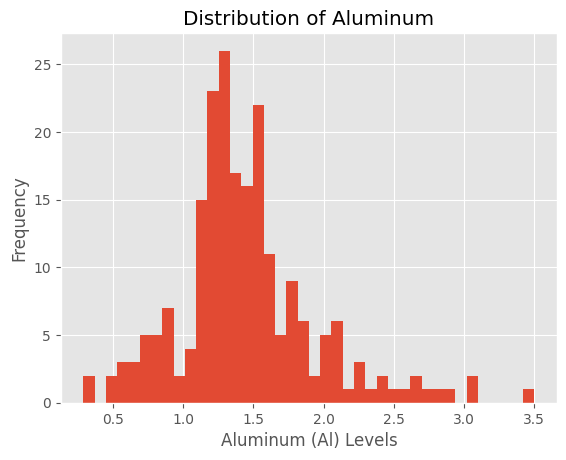

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['Al'], bins=40)
ax.set_title('Distribution of Aluminum')
ax.set_xlabel('Aluminum (Al) Levels')
ax.set_ylabel('Frequency')
plt.show()

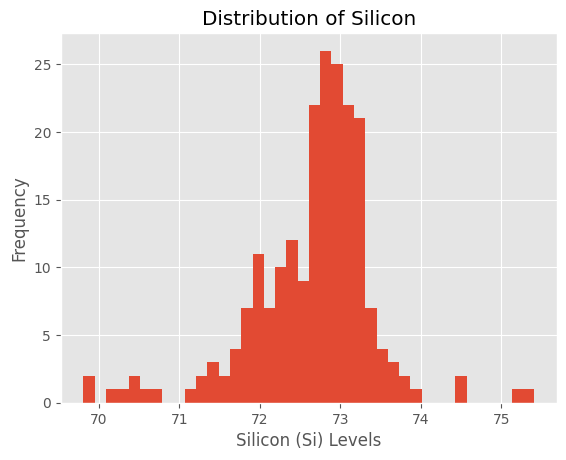

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['Si'], bins=40)
ax.set_title('Distribution of Silicon')
ax.set_xlabel('Silicon (Si) Levels')
ax.set_ylabel('Frequency')
plt.show()

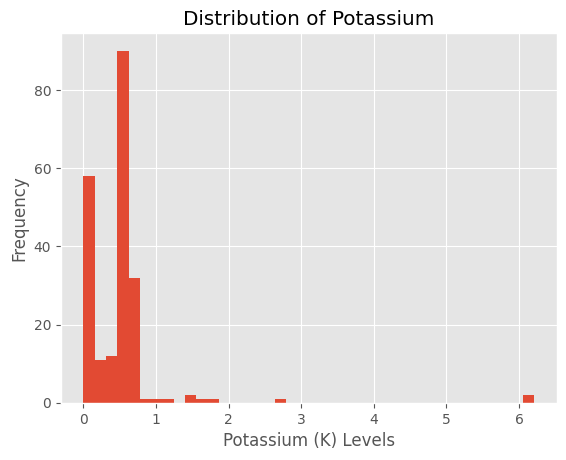

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['K'], bins=40)
ax.set_title('Distribution of Potassium')
ax.set_xlabel('Potassium (K) Levels')
ax.set_ylabel('Frequency')
plt.show()

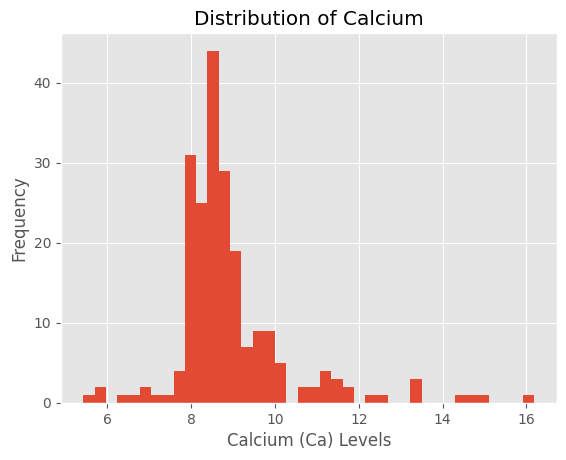

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['Ca'], bins=40)
ax.set_title('Distribution of Calcium')
ax.set_xlabel('Calcium (Ca) Levels')
ax.set_ylabel('Frequency')
plt.show()

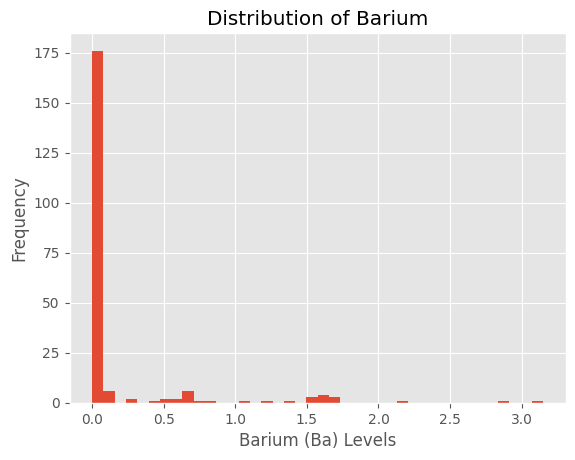

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['Ba'], bins=40)
ax.set_title('Distribution of Barium')
ax.set_xlabel('Barium (Ba) Levels')
ax.set_ylabel('Frequency')
plt.show()


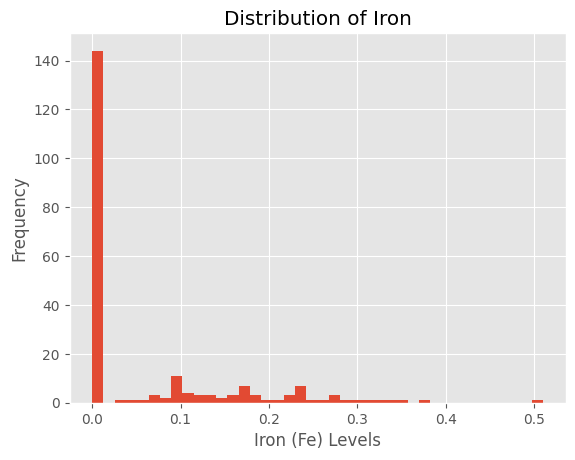

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['Fe'], bins=40)
ax.set_title('Distribution of Iron')
ax.set_xlabel('Iron (Fe) Levels')
ax.set_ylabel('Frequency')
plt.show()

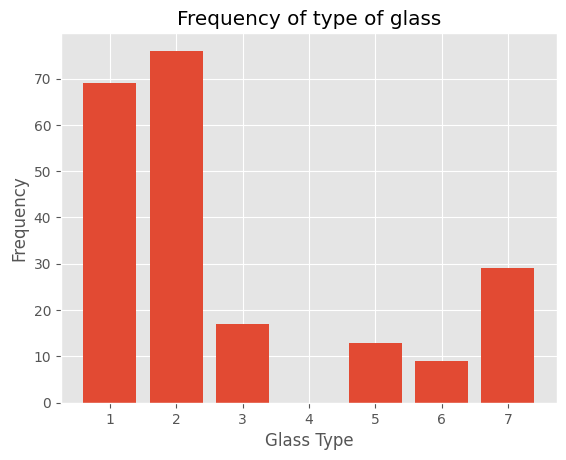

In [ ]:
glass_counts = data['Type'].value_counts().sort_index()
plt.bar(glass_counts.index, glass_counts.values)
plt.title('Frequency of type of glass')
plt.xlabel('Glass Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


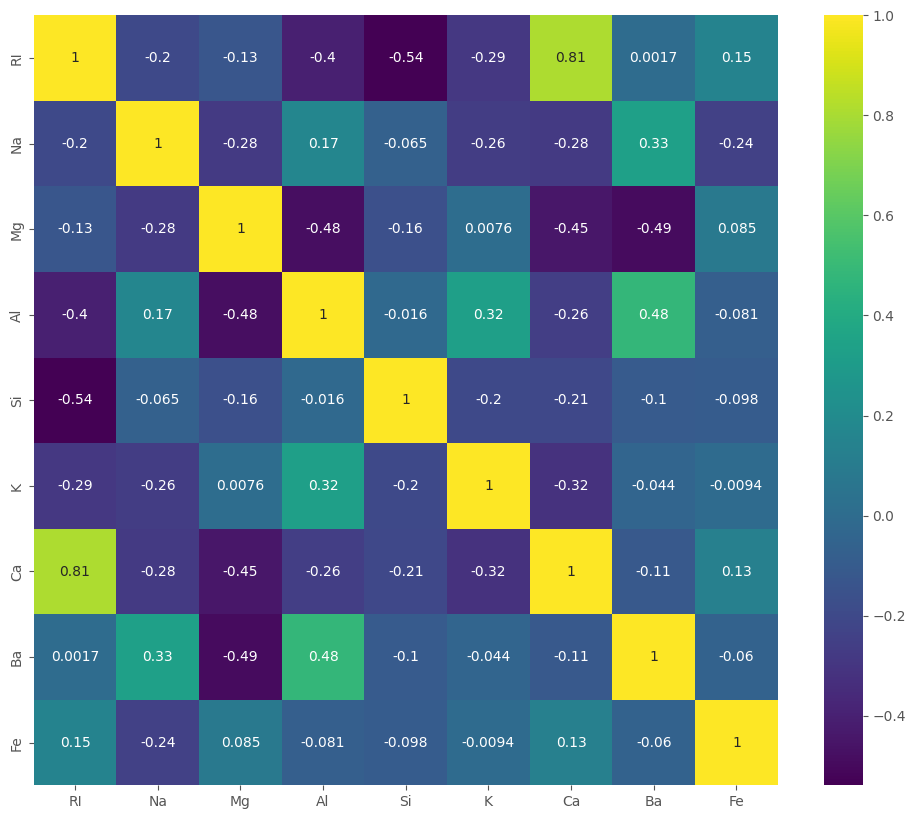

In [ ]:
plt.figure(figsize=(12, 10))

sns.heatmap(data.drop('Type', axis=1).corr(), annot=True, cmap="viridis")

plt.show()

In [ ]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
x = data.drop('Type', axis = 1)
y = data[['Type']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, shuffle=True, random_state=42
)

sm = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.79      0.73      0.76        15
           3       0.50      0.67      0.57         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.79      0.84      0.80        43
weighted avg       0.81      0.79      0.79        43



In [ ]:
print('Training Accuracy', model.score(x_resampled, y_resampled))

Training Accuracy 1.0


In [ ]:
print('Testing Accuracy', model.score(x_test, y_test))

Testing Accuracy 0.7906976744186046


In [ ]:
bagg = BaggingClassifier()

In [ ]:
bagg.fit(x_resampled, y_resampled)

BaggingClassifier()

In [ ]:
y_pred_1 = bagg.predict(x_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.75      0.60      0.67        15
           3       0.50      0.67      0.57         3
           5       1.00      1.00      1.00         3
           6       0.50      1.00      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.75      0.81      0.76        43
weighted avg       0.77      0.74      0.75        43



In [ ]:
print('Training Accuracy', bagg.score(x_resampled, y_resampled))

Training Accuracy 0.9918032786885246


In [ ]:
print('Testing Accuracy', bagg.score(x_test, y_test))

Testing Accuracy 0.7441860465116279


In [ ]:
xg = XGBClassifier(n_estimators=100)

In [ ]:
y_resampled

,Type
0,7
1,1
2,1
3,1
4,2
...,...
361,7
362,7
363,7
364,7


In [ ]:
label_mapping = {1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5}
y_resampled_mod = y_resampled['Type'].map(label_mapping)


In [ ]:
y_test_series = y_test['Type']
y_test_mod = y_test_series.map({1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5})

In [ ]:
xg.fit(x_resampled, y_resampled_mod)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_2 = xg.predict(x_test)
print(classification_report(y_test_mod, y_pred_2))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.92      0.73      0.81        15
           2       0.50      0.67      0.57         3
           3       0.75      1.00      0.86         3
           4       0.67      1.00      0.80         2
           5       0.86      1.00      0.92         6

    accuracy                           0.84        43
   macro avg       0.77      0.88      0.81        43
weighted avg       0.86      0.84      0.84        43



In [ ]:
print('Training Accuracy', xg.score(x_resampled, y_resampled_mod))

Training Accuracy 1.0


In [ ]:
  print('Testing Accuracy', xg.score(x_test, y_test_mod))

Testing Accuracy 0.8372093023255814


Interview Questions :**bold text**

1) . Explain Bagging and Boosting methods. How is it different from each other.

Ans->

1) Bagging (Bootstrap Aggregating):

- 1)Bagging creates multiple models using random subsets of the training data (with replacement).

- 2) All models are trained independently and in parallel.

- 3) The final prediction is made by majority voting (for classification) or averaging (for regression).

- 4) Example: Random Forest is a common bagging algorithm.

- 5) Bagging helps to reduce variance and avoid overfitting.

2) Boosting:
- 1) Boosting builds models sequentially, where each new model tries to correct errors made by the previous one.

- 2) Models are dependent on each other, and trained step-by-step.

- 3) It gives more weight to wrongly predicted data points in each step.

- 4) Example: AdaBoost, Gradient Boosting, XGBoost are popular boosting algorithms.

- 5) Boosting helps to reduce bias and variance, and gives higher accuracy than bagging in many cases.

2) . Explain how to handle imbalance in the data.

Ans->

1) Resampling techniques: Use oversampling (like SMOTE) to increase minority class samples or undersampling to reduce majority class samples.

2) Use appropriate evaluation metrics: Instead of accuracy, use metrics like precision, recall, F1-score, or ROC-AUC that better reflect model performance on imbalanced data.

3) Use algorithms that handle imbalance: Some models like XGBoost or balanced Random Forest have built-in options to handle class imbalance.

4) Adjust class weights: Assign higher weights to minority class during training to make the model pay more attention to it.

5) Generate synthetic data: Techniques like SMOTE create new synthetic samples of the minority class to balance the dataset.

